Z-score treatment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DS/dataweek1/gm_2008_region.csv')
df.sample(5)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
115,50348811.0,2.54,17.9,9.427960,26.85538,12263.0,130.9949,55.0,66.1,Sub-Saharan Africa
109,9109535.0,1.41,0.1,5.271223,26.51495,12522.0,130.3755,76.4,8.0,Europe & Central Asia
63,59319234.0,1.39,0.3,7.465942,26.48020,37475.0,123.7030,81.4,4.1,Europe & Central Asia
83,4111168.0,1.49,0.4,1.313321,24.23690,3890.0,129.9424,69.6,17.6,Europe & Central Asia
19,14709011.0,6.04,1.2,0.109419,21.27157,1358.0,130.6651,59.4,130.4,Sub-Saharan Africa


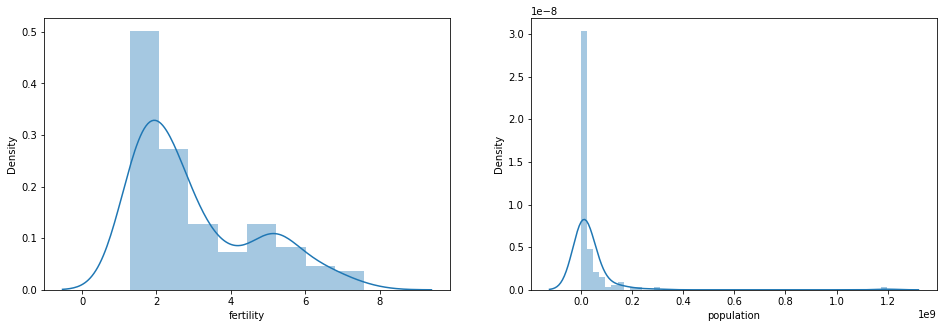

In [8]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['fertility'])
plt.subplot(1,2,2)
sns.distplot(df['population'])
plt.show()

In [9]:
print("Highest allowed",df['fertility'].mean() + 3*df['fertility'].std())
print("Lowest allowed",df['fertility'].mean() - 3*df['fertility'].std())

Highest allowed 7.851171354513928
Lowest allowed -1.8409555271757978


In [14]:
df[(df['fertility'] > 7.85) | (df['fertility'] < -1.84)]
new_df = df[(df['fertility'] > 7.85) | (df['fertility'] < -1.84)]
new_df

upper_limit = df['fertility'].mean() + 3*df['fertility'].std()
lower_limit = df['fertility'].mean() - 3*df['fertility'].std()

df['fertility'] = np.where(
    df['fertility']>upper_limit,
    upper_limit,
    np.where(
        df['fertility']<lower_limit,
        lower_limit,
        df['fertility']
    )
)
df['fertility'].describe()

count    139.000000
mean       3.005108
std        1.615354
min        1.280000
25%        1.810000
50%        2.410000
75%        4.095000
max        7.590000
Name: fertility, dtype: float64

IQR based filtering

https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/